<a href="https://colab.research.google.com/github/park-janghyeon/ai-of-everyone/blob/main/mnist_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from tensorflow.keras.models import Sequential #sequential 함수 불러오기
from tensorflow.keras.layers import Dense, Activation #Dense는 레이어의 뉴런개수, activation은 활성화함수
from tensorflow.keras.utils import to_categorical #원핫인코딩 설정
from tensorflow.keras.datasets import mnist #데이터셋에서 mnist 데이터 불러오기
import numpy as np
import matplotlib.pyplot as plt

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #mnist는 4부분으로 나눠짐
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [20]:
X_train = x_train.reshape(60000, 784) #784 = 28 * 28 
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')# 정규화를 위해 데이터를 0~1 사이의 값으로 만들기 위해 
X_test = X_test.astype('float32')# 정규화를 하면 데이터의 특성이 더 잘 드러난다
X_train /= 255                   # mnist의 데이터는 0~255의 값으로 이뤄져있으므로(정규화)
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [21]:
nb_classes = 10
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [22]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
 activation_8 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-tr

In [23]:
# compile 함수는 심층 신경망이 학습하는 방법을 정한다
# 파라미터의 설명: loss 오차 계산법, optimizer 오차 줄이는법, metrics 학습 결과 어떻게 확인?
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit 함수는 실제로 학습시키는 함수
# batch_size란 한 번에 학습하는 데이터 수, epoch는 모든 데이터를 1번 학습하는 것, verbose는 결과값 출력방법
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.2260 - accuracy: 0.9339
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0825 - accuracy: 0.9746
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0524 - accuracy: 0.9838
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0351 - accuracy: 0.9889
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9911
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9927
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0139 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0159 - accuracy: 0.9948

In [24]:
# evaluate 함수는 테스트 데이터, 테스트 데이터의 정답을 넣어준다
score = model.evaluate(X_test, Y_test)

# 리턴값으로 loss와 accuracy를 반환
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.9794
Test score: 0.09035015106201172
Test accuracy: 0.9793999791145325


In [26]:
# argmax 메서드는 여러 데이터 중 가장 큰 값이 어디에 있는지 나타낸다
# axis = 0은 열에서, axis = 1 은 행에서 
predicted_classes = np.argmax(model.predict(X_test), axis=1) 

# nonzero 함수 -> predicted_class랑 y_test랑 일치하는 것의 인덱스를 반환
# [0] 해주는 이유는 행 열 로 리턴해주므로 행만 알아내기 위해서
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 1ms/step


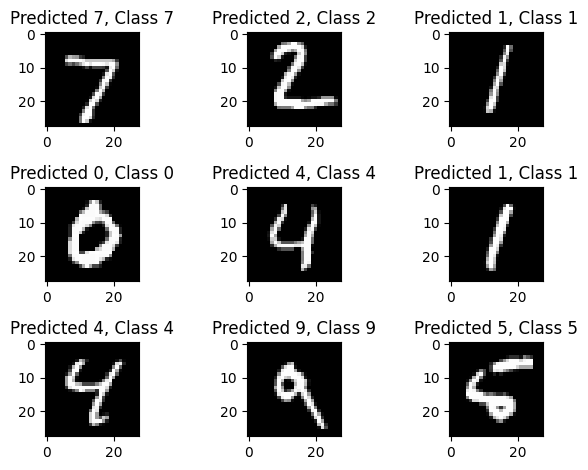

In [27]:
# 그래프를 그리겠다.
plt.figure()

# 
for i, correct in enumerate(correct_indices[:9]): 
		# subplot 함수는 그림그릴 위치를 정해주는 함수, 가로 세로 순서
    plt.subplot(3,3,i+1)

		# imshow는 어떤 이미지를 보여줄지에 대한 내용.
		# X_test 데이터를 한 줄로 만들었으니 다시 28*28 형태로 만듦. cmap 그림색깔
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')

    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

# 그림 출력    
plt.tight_layout()

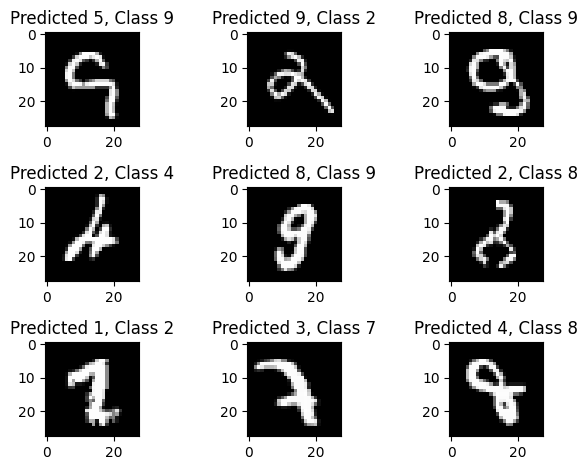

In [28]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()